### ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams["figure.figsize"]=28,28

In [2]:
# open ogiginal image
img=image.load_img("original-data/8.jpg")
# transfer into numpy format
x=image.img_to_array(img)
# increase the images' level（height,width,3) -> (1,height,width,3)
x=x.reshape((1,)+x.shape)

In [3]:
def show_imgs(imgs,row,col):
    if len(imgs) != (row*col):
        raise ValueError("No use images：{} col:{}".format(len(imgs),row,col))
    for i, img in enumerate(imgs):
        plot_num=i+1
        plt.subplot(row,col,plot_num)
        plt.tick_params(labelbottom=False)#no x axis
        plt.tick_params(labelleft=False) #no y axis
        plt.imshow(img)
    plt.show()

In [4]:
'''
datagen=ImageDataGenerator(
    # Side-to-side rotation
    rotation_range=0, #45,90
    # Left and right displacement
    width_shift_range=0,        #Number of pixels or percentage
    # Upper and lower displacement
    height_shift_range=0,       # Number of pixels or percentage
    # deformation
    shear_range=0, #10, 40
    # Zoom
    zoom_range=0,
    # Horizontal reversal
    horizontal_flip=False,
    # Vertical reversal
    vertical_flip=False
)'''

'\ndatagen=ImageDataGenerator(\n    # Side-to-side rotation\n    rotation_range=0, #45,90\n    # Left and right displacement\n    width_shift_range=0,        #Number of pixels or percentage\n    # Upper and lower displacement\n    height_shift_range=0,       # Number of pixels or percentage\n    # deformation\n    shear_range=0, #10, 40\n    # Zoom\n    zoom_range=0,\n    # Horizontal reversal\n    horizontal_flip=False,\n    # Vertical reversal\n    vertical_flip=False\n)'

In [5]:
datagen=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    
    #Side-to-side rotation
    rotation_range=40, #45,90
    #Left and right displacement
    width_shift_range=70.0,# Number of pixels or percentage
    #Up and down displacement
    height_shift_range=50.0,# Number of pixels or percentage
    brightness_range=None,
    # deformation
    shear_range=0.0,#10, 40
    #zoom
    zoom_range=[1,2.0],
    channel_shift_range=50,
    fill_mode='nearest',
    cval=0.2,
    #Horizontal reversal
    horizontal_flip=True,
    #Vertical reversal
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.1,
    interpolation_order=1,
    dtype=None
)

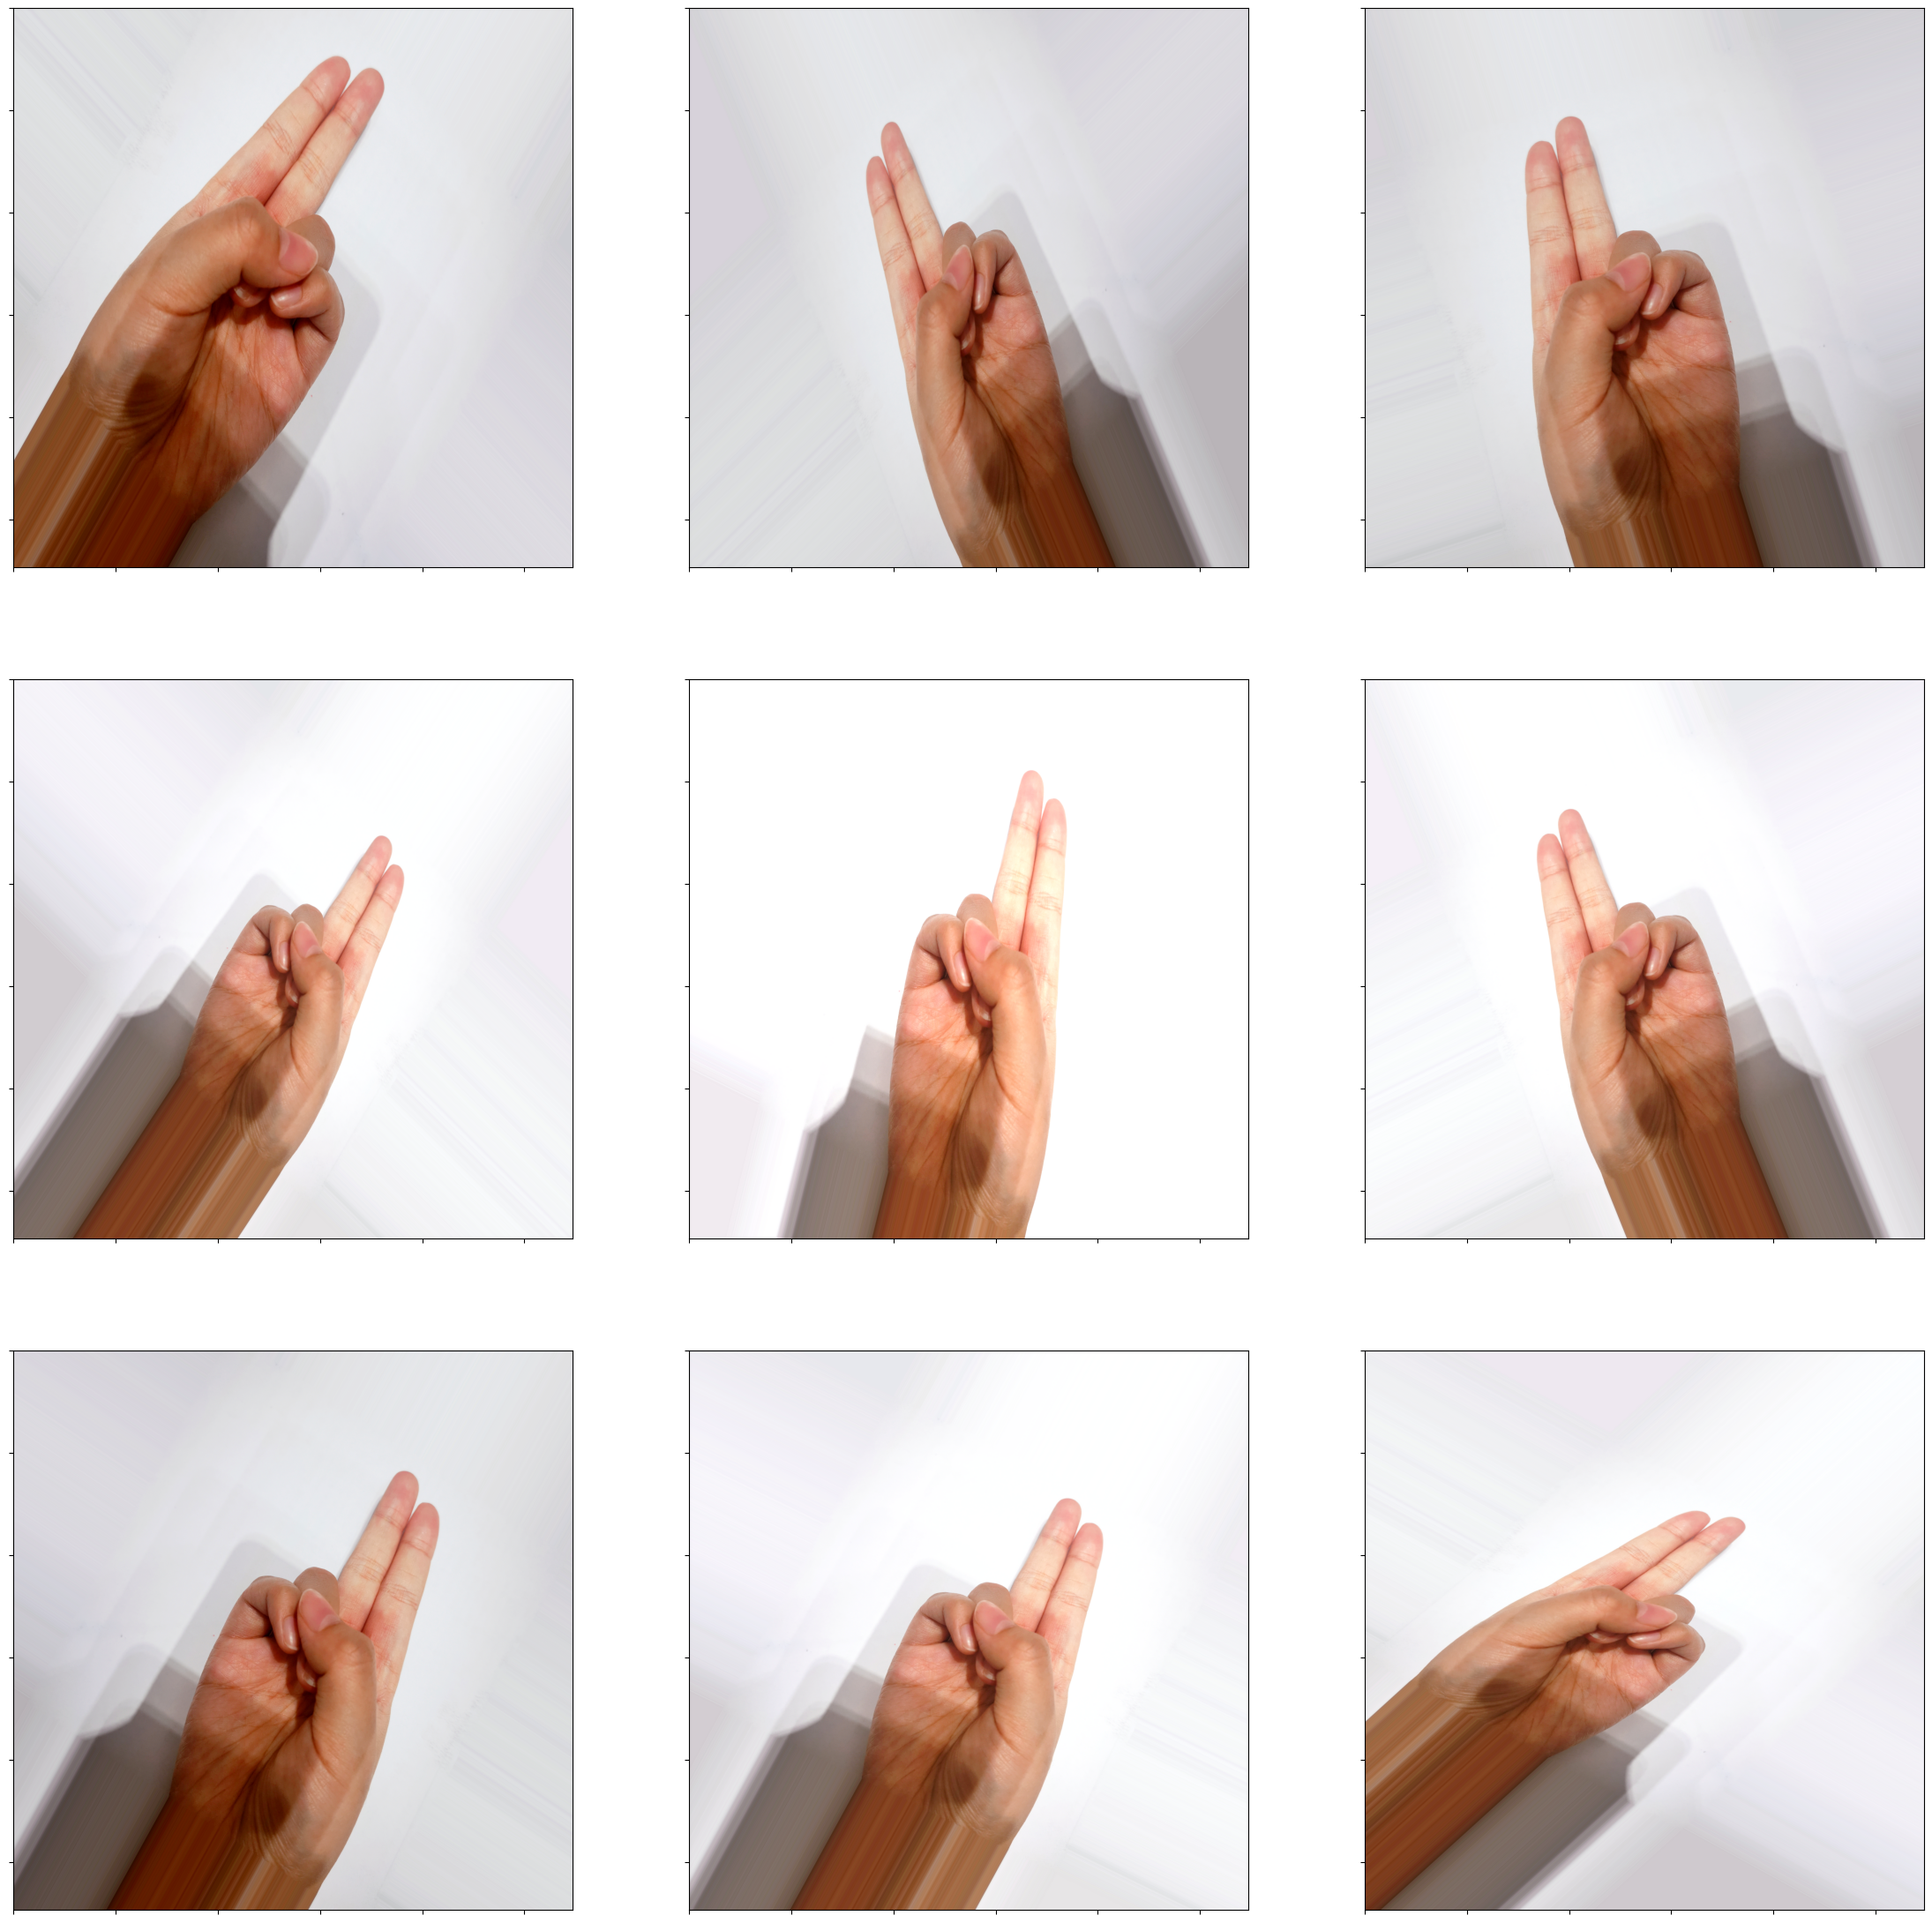

In [9]:
# number of generate images
max_img_num=9
imgs=[]
for d in datagen.flow(x,batch_size=1):
    #Convert the numpy array to a picture
    imgs.append(image.array_to_img(d[0],scale=True))
    # When the number of images generated is reached, exit the training, 
    # because the datagen.flow function will be generated indefinitely
    if(len(imgs)%max_img_num)==0:
        break
# Displays the generated image set
show_imgs(imgs, row=3, col=3) # row*col must equal to max_img_num, can remove


In [11]:
import cv2
import time
now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time())) 
for n in range(0,len(imgs)):
    path='new-data/'+'0000'+str(n)+str(now)+'.png'
    pic=imgs[n]
    pic.save(path)
